**IMPORT LIBRARIES**

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Modelling Helpers :
from sklearn.model_selection import train_test_split

# Preprocessing :
from sklearn.preprocessing import LabelEncoder

# Metrics :
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score, classification_report, confusion_matrix

print("Libraries Imported...")

Libraries Imported...


**LOAD DATASET**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
asd=pd.read_csv('/content/drive/MyDrive/Toddle_Autism_dataset_July2018.csv')
asd.head()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,ASD
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes


**PERFORMING EDA**

In [4]:
asd.describe()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score
count,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000
mean,527.500000,0.563567,0.448767,0.401328,0.512334,0.524668,0.576850,0.649905,0.459203,0.489564,0.586338,27.867173,5.212524
std,304.407895,0.496178,0.497604,0.490400,0.500085,0.499628,0.494293,0.477226,0.498569,0.500128,0.492723,7.980354,2.907304
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000
25%,264.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,3.000000
50%,527.500000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,30.000000,5.000000
75%,790.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,8.000000
max,1054.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,10.000000


In [5]:
asd.columns

Index(['Case_No', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'Age_Mons', 'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice',
       'Family_mem_with_ASD', 'Who completed the test', 'ASD '],
      dtype='object')

In [6]:
asd.dtypes

Case_No                    int64
A1                         int64
A2                         int64
A3                         int64
A4                         int64
A5                         int64
A6                         int64
A7                         int64
A8                         int64
A9                         int64
A10                        int64
Age_Mons                   int64
Qchat-10-Score             int64
Sex                       object
Ethnicity                 object
Jaundice                  object
Family_mem_with_ASD       object
Who completed the test    object
ASD                       object
dtype: object

In [7]:
asd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Case_No                 1054 non-null   int64 
 1   A1                      1054 non-null   int64 
 2   A2                      1054 non-null   int64 
 3   A3                      1054 non-null   int64 
 4   A4                      1054 non-null   int64 
 5   A5                      1054 non-null   int64 
 6   A6                      1054 non-null   int64 
 7   A7                      1054 non-null   int64 
 8   A8                      1054 non-null   int64 
 9   A9                      1054 non-null   int64 
 10  A10                     1054 non-null   int64 
 11  Age_Mons                1054 non-null   int64 
 12  Qchat-10-Score          1054 non-null   int64 
 13  Sex                     1054 non-null   object
 14  Ethnicity               1054 non-null   object
 15  Jaun

In [8]:
asd.drop(['Case_No','Qchat-10-Score','Who completed the test'], axis = 1, inplace = True)
asd.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age_Mons',
       'Sex', 'Ethnicity', 'Jaundice', 'Family_mem_with_ASD', 'ASD '],
      dtype='object')

In [9]:
pd.DataFrame(asd.isnull().sum(),columns=["Missing Values"]).style.bar(color="#84A9AC")

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/style.py:4165: RuntimeWarning: invalid value encountered in scalar divide
  end = (x - left) / (right - left)


,Missing Values
A1,0
A2,0
A3,0
A4,0
A5,0
A6,0
A7,0
A8,0
A9,0
A10,0


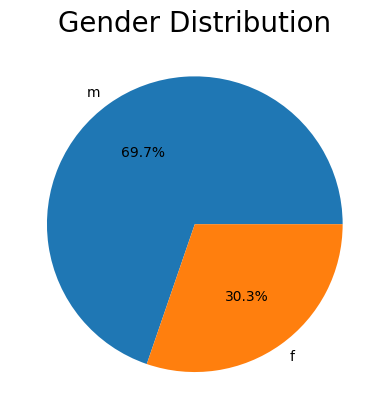

In [10]:
import matplotlib.pyplot as plt
sex_counts = asd['Sex'].value_counts()
fig,ax=plt.subplots()
ax.pie(sex_counts.values,labels=sex_counts.index,autopct='%1.1f%%')
ax.set_title('Gender Distribution',fontsize=20)
ax.set_aspect('equal')
plt.show()

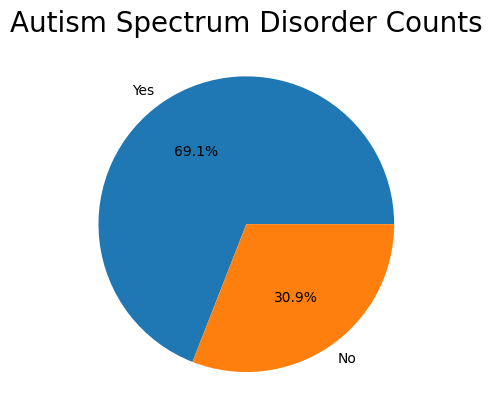

In [12]:
import matplotlib.pyplot as plt

# Calculate the counts of each ASD trait category
asd_counts = asd['ASD '].value_counts()

# Create the figure and axis
fig, ax = plt.subplots()

# Plot the pie chart
ax.pie(asd_counts, labels=asd_counts.index, autopct='%1.1f%%')

# Set the title
ax.set_title('Autism Spectrum Disorder Counts', fontsize=20)

# Show the chart
plt.show()

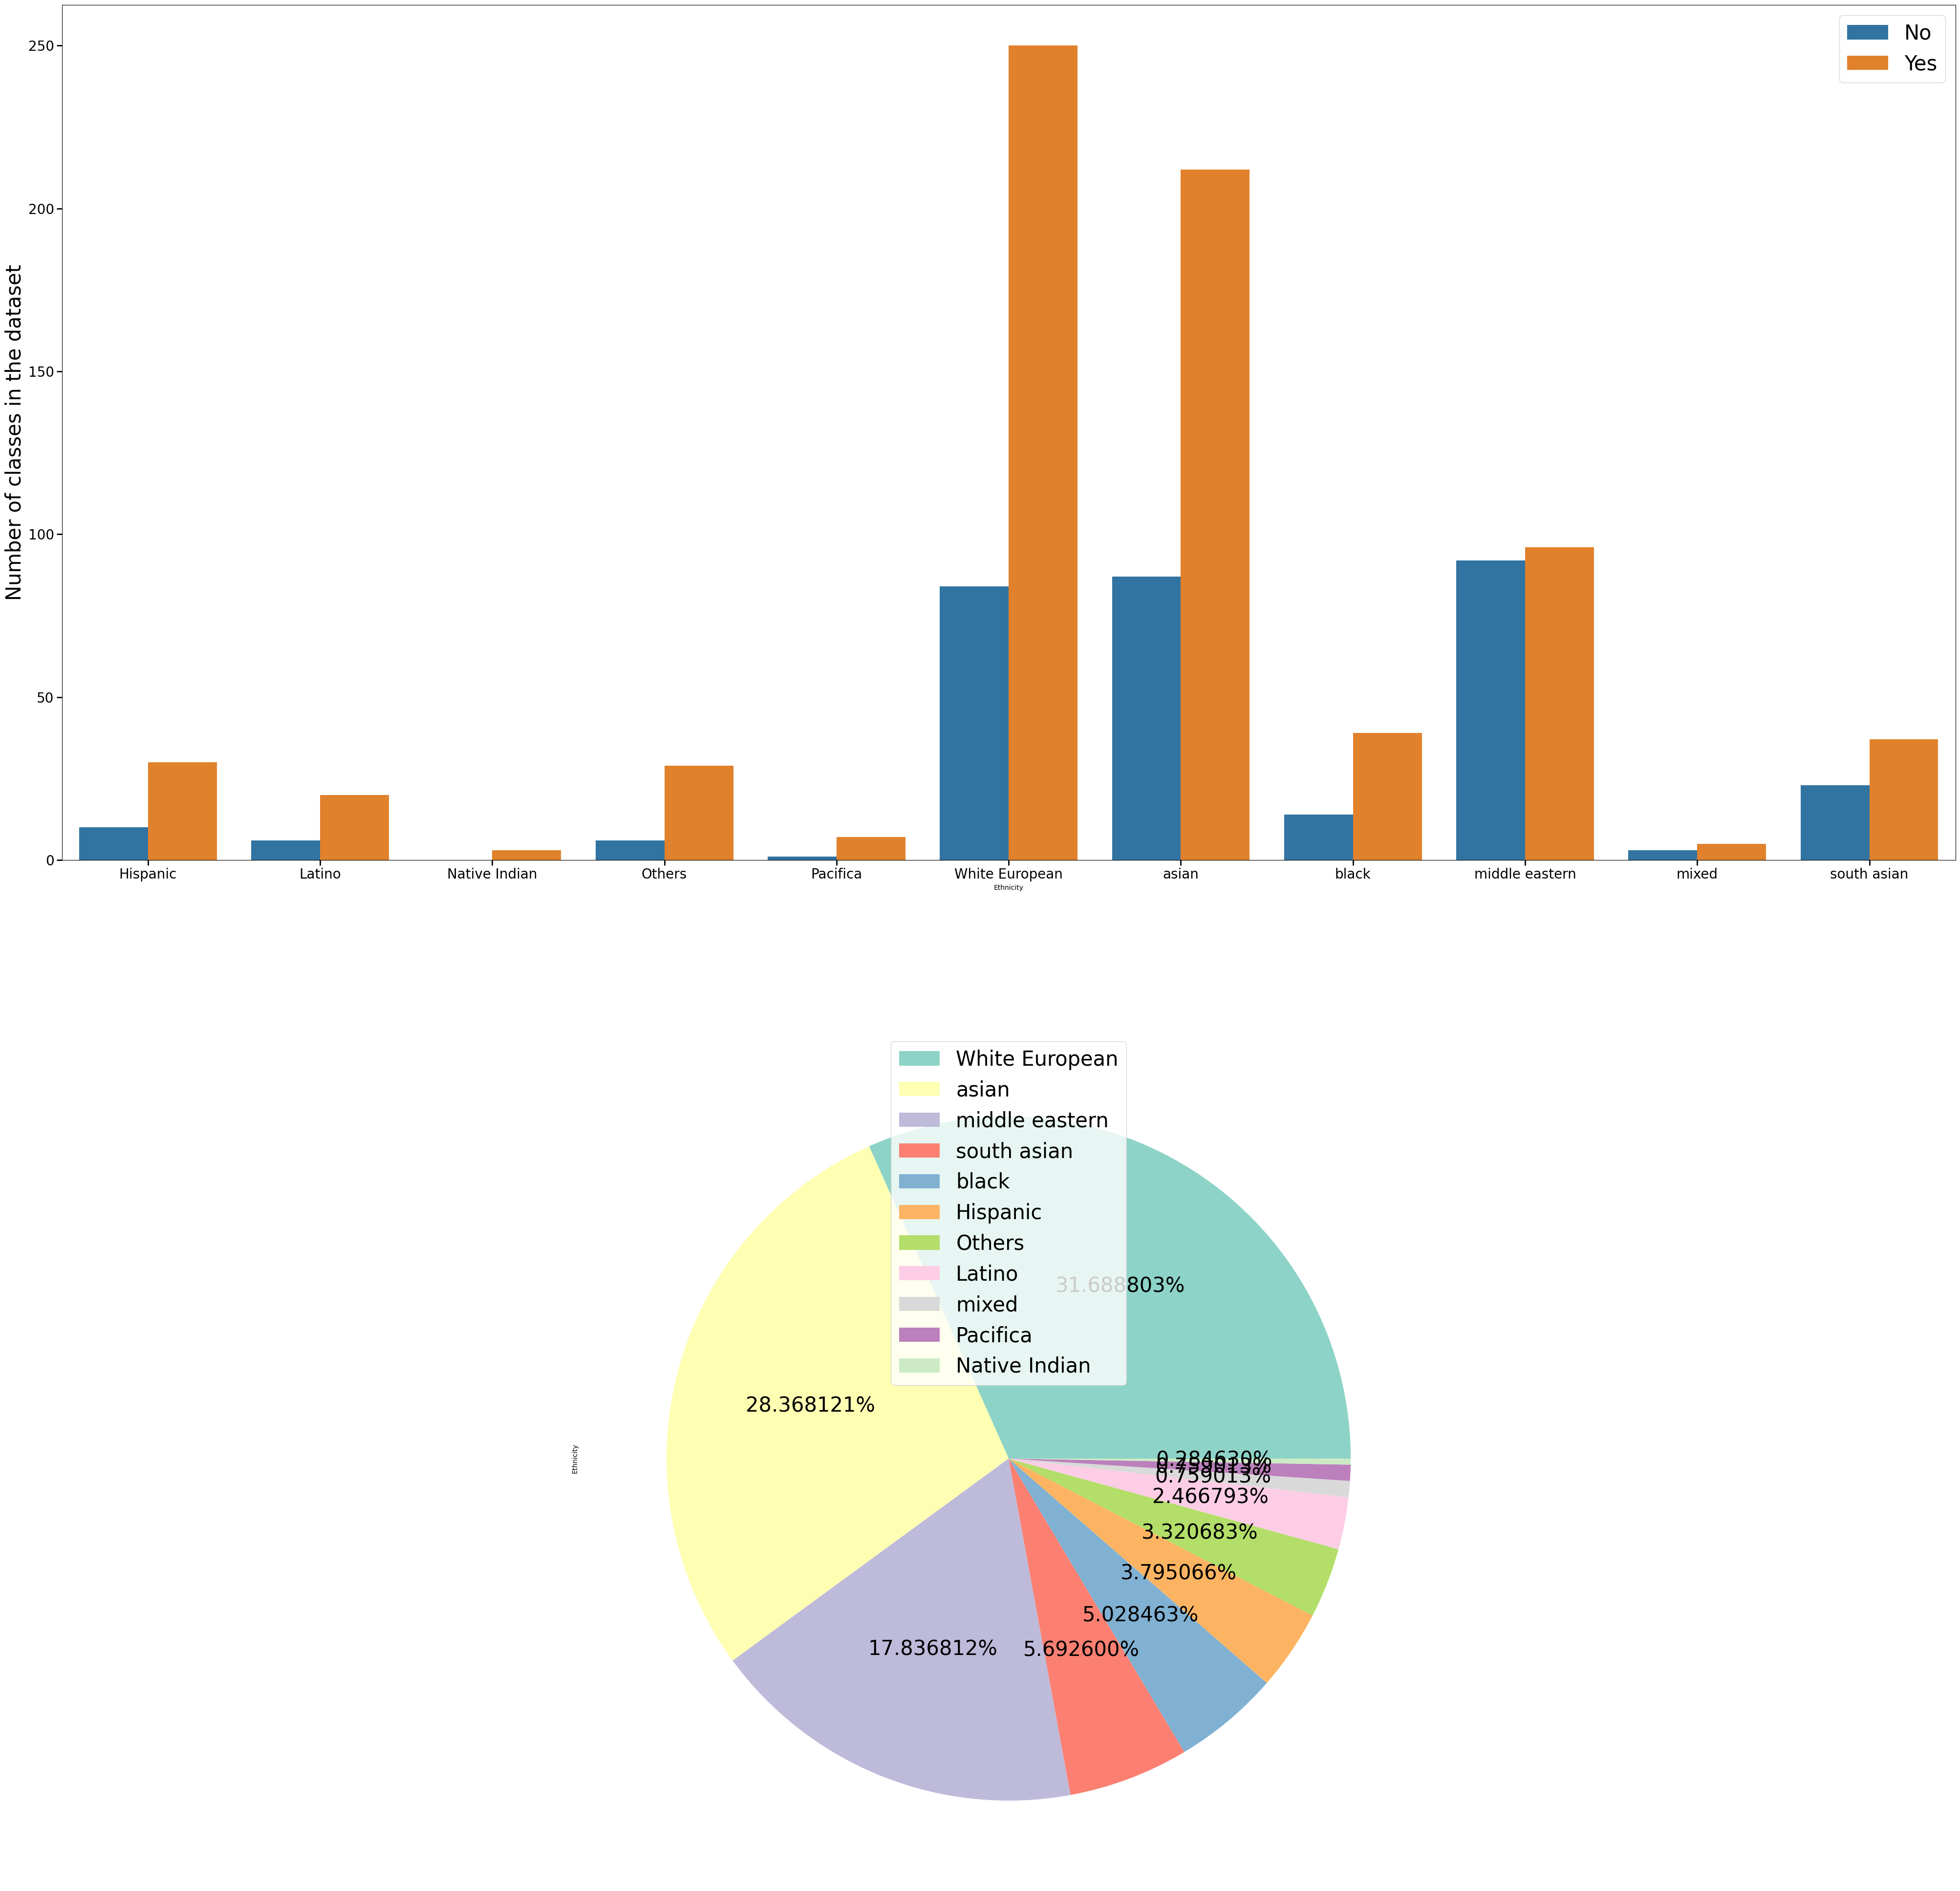

In [13]:
fig, ax = plt.subplots(2, 1, figsize=(35, 20))  # Increase the height of the figure

grouped_data = asd.groupby(['Ethnicity', 'ASD ']).size().reset_index(name='Count')

target_counts_barplot = sns.barplot(x='Ethnicity', y='Count', hue='ASD ', data=grouped_data, ax=ax[0])
target_counts_barplot.set_ylabel('Number of classes in the dataset', fontsize=30) 
target_counts_barplot.tick_params(axis='x', labelsize=20, width=2, length=8)  # Increase x-axis number size and thickness
target_counts_barplot.tick_params(axis='y', labelsize=20, width=2, length=8)  # Increase y-axis number size and thickness


# Count the occurrences of each ethnicity in the original data
ethnicity_counts = asd['Ethnicity'].value_counts()

# Specify a separate figsize for the pie chart
target_counts_pie = ethnicity_counts.plot.pie(autopct="%3f%%", ax=ax[1], colors=sns.color_palette('Set3'), figsize=(50, 50),
                                              fontsize=30, labeldistance=None)  # Increase the font size
ax[0].legend(fontsize=30)  # Increase the font size of the legend
ax[1].legend(fontsize=30)  # Increase the font size of the legend

plt.show()

**ONE-HOT ENCODING**

In [14]:
# Perform one-hot encoding
asd = pd.get_dummies(asd, columns=['Ethnicity'])
asd.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,Ethnicity_Latino,Ethnicity_Native Indian,Ethnicity_Others,Ethnicity_Pacifica,Ethnicity_White European,Ethnicity_asian,Ethnicity_black,Ethnicity_middle eastern,Ethnicity_mixed,Ethnicity_south asian
0,0,0,0,0,0,0,1,1,0,1,...,0,0,0,0,0,0,0,1,0,0
1,1,1,0,0,0,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,1,1,0,1,...,0,0,0,0,0,0,0,1,0,0
3,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,1,1,1,1,1,1,1,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
asd.dtypes

A1                           int64
A2                           int64
A3                           int64
A4                           int64
A5                           int64
A6                           int64
A7                           int64
A8                           int64
A9                           int64
A10                          int64
Age_Mons                     int64
Sex                         object
Jaundice                    object
Family_mem_with_ASD         object
ASD                         object
Ethnicity_Hispanic           uint8
Ethnicity_Latino             uint8
Ethnicity_Native Indian      uint8
Ethnicity_Others             uint8
Ethnicity_Pacifica           uint8
Ethnicity_White European     uint8
Ethnicity_asian              uint8
Ethnicity_black              uint8
Ethnicity_middle eastern     uint8
Ethnicity_mixed              uint8
Ethnicity_south asian        uint8
dtype: object

In [ ]:
for col in ['Family_mem_with_ASD','ASD ','Jaundice','Sex']:
  print("-----------------------------------------------------------------------------")
  print(f'Column name: {col}\n')
  print(f'Unique values: \n{asd[col].unique()}\n\n')

-----------------------------------------------------------------------------
Column name: Family_mem_with_ASD

Unique values: 
['no' 'yes']


-----------------------------------------------------------------------------
Column name: ASD 

Unique values: 
['No' 'Yes']


-----------------------------------------------------------------------------
Column name: Jaundice

Unique values: 
['yes' 'no']


-----------------------------------------------------------------------------
Column name: Sex

Unique values: 
['f' 'm']




**LABEL ENCODING**

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for column in asd.select_dtypes(include=['object']):
    asd[column] = label_encoder.fit_transform(asd[column])

print("Encoded DataFrame:")
asd.head()


Encoded DataFrame:


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,Ethnicity_Latino,Ethnicity_Native Indian,Ethnicity_Others,Ethnicity_Pacifica,Ethnicity_White European,Ethnicity_asian,Ethnicity_black,Ethnicity_middle eastern,Ethnicity_mixed,Ethnicity_south asian
0,0,0,0,0,0,0,1,1,0,1,...,0,0,0,0,0,0,0,1,0,0
1,1,1,0,0,0,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,1,1,0,1,...,0,0,0,0,0,0,0,1,0,0
3,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,1,1,1,1,1,1,1,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
asd['Sex']

0       0
1       1
2       1
3       1
4       0
       ..
1049    0
1050    1
1051    1
1052    1
1053    1
Name: Sex, Length: 1054, dtype: int64

In [ ]:
asd.dtypes

A1                          int64
A2                          int64
A3                          int64
A4                          int64
A5                          int64
A6                          int64
A7                          int64
A8                          int64
A9                          int64
A10                         int64
Age_Mons                    int64
Sex                         int64
Jaundice                    int64
Family_mem_with_ASD         int64
ASD                         int64
Ethnicity_Hispanic          uint8
Ethnicity_Latino            uint8
Ethnicity_Native Indian     uint8
Ethnicity_Others            uint8
Ethnicity_Pacifica          uint8
Ethnicity_White European    uint8
Ethnicity_asian             uint8
Ethnicity_black             uint8
Ethnicity_middle eastern    uint8
Ethnicity_mixed             uint8
Ethnicity_south asian       uint8
dtype: object

In [ ]:
X = asd.drop(['ASD '],axis=1)
y = asd['ASD ']
X.columns = X.columns.astype(str)

In [ ]:
X.shape

(1054, 25)

In [ ]:
y.head()

0    0
1    1
2    1
3    1
4    1
Name: ASD , dtype: int64

**SPLITTING DATA INTO TRAINING & TESTING SET**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Processed...')

Processed...


**LOGISTIC REGRESSION**

In [ ]:
logistic_reg = LogisticRegression()

# Fit the model to the training data
logistic_reg.fit(x_train, y_train)

# Make predictions on the testing data
predictions = logistic_reg.predict(x_test)

# Evaluate the model
accuracy = logistic_reg.score(x_test, y_test)
print("Accuracy:", accuracy)

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))
print("Classification Report:")
print(classification_report(y_test, predictions))

Accuracy: 0.95260663507109
Confusion Matrix:
[[ 65   4]
 [  6 136]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93        69
           1       0.97      0.96      0.96       142

    accuracy                           0.95       211
   macro avg       0.94      0.95      0.95       211
weighted avg       0.95      0.95      0.95       211



**NAIVE BAYES**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Initialize the Multinomial Naive Bayes classifier
naive_bayes = MultinomialNB()

# Fit the classifier to the training data
naive_bayes.fit(x_train, y_train)

# Make predictions on the testing data
predictions = naive_bayes.predict(x_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))
print("\nClassification Report:")
print(classification_report(y_test, predictions))


Accuracy: 0.9146919431279621
Confusion Matrix:
[[ 60   9]
 [  9 133]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87        69
           1       0.94      0.94      0.94       142

    accuracy                           0.91       211
   macro avg       0.90      0.90      0.90       211
weighted avg       0.91      0.91      0.91       211



**K NEAREST NEIGHBOURS**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

k = 3
knn_classifier = KNeighborsClassifier(n_neighbors=k)

# Fit the classifier to the training data
knn_classifier.fit(x_train, y_train)

# Make predictions on the testing data
predictions = knn_classifier.predict(x_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))
print("\nClassification Report:")
print(classification_report(y_test, predictions))

Accuracy: 0.9052132701421801
Confusion Matrix:
[[ 63   6]
 [ 14 128]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.91      0.86        69
           1       0.96      0.90      0.93       142

    accuracy                           0.91       211
   macro avg       0.89      0.91      0.90       211
weighted avg       0.91      0.91      0.91       211



**SUPPORT VECTOR MACHINES**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

# Initialize the SVM classifier
svm_classifier = SVC()

# Fit the classifier to the training data
svm_classifier.fit(x_train, y_train)

# Make predictions on the testing data
predictions = svm_classifier.predict(x_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))
print("\nClassification Report:")
print(classification_report(y_test, predictions))

Accuracy: 0.8483412322274881
Confusion Matrix:
[[ 37  32]
 [  0 142]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.54      0.70        69
           1       0.82      1.00      0.90       142

    accuracy                           0.85       211
   macro avg       0.91      0.77      0.80       211
weighted avg       0.88      0.85      0.83       211



**RANDOM FOREST CLASSIFIER**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import joblib

rfc = RandomForestClassifier(n_estimators=500)
rfc.fit(x_train, y_train)

pred_rfc = rfc.predict(x_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, pred_rfc)
print("Accuracy:", accuracy)
# Print confusion matrix and classification report
print("Confusion Matrix:")
print(confusion_matrix(y_test, pred_rfc))
print("\nClassification Report:")
print(classification_report(y_test, pred_rfc))

Accuracy: 0.976303317535545
Confusion Matrix:
[[ 66   3]
 [  2 140]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96        69
           1       0.98      0.99      0.98       142

    accuracy                           0.98       211
   macro avg       0.97      0.97      0.97       211
weighted avg       0.98      0.98      0.98       211



**SAVING THE BEST MODEL**

In [ ]:
import joblib
with open('random_forest_model1.joblib', 'wb') as f:
    joblib.dump(rfc, f)